# Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import random
import time



# Functions

**StartStopp**


In [ ]:
def StartStopp(user_input):                     #Wenn user_input == s dann on_off -> true
    if user_input:
         on_off = True
    return on_off

**ControlUnit**


In [ ]:
def ControlUnit(on_off):
    #Parameter
    dig_frequenz = 50                           #Ultraschallsensoren liegen zwischen 20 kHz und 1 GHz -> Nutzbereich FAS: typ. 40 kHz … 60 kHz -> 50kHz
    dig_puls_duration = 1.3                     #So lange wie möglich 
                                    
    dig_amplitude = 1                           #Digitial -> 0/1

    #Erzeugung digitales Signal                 Dictionary mit Schlüssel/Wert-Paaren 
    digital_signal = {
        "frequenz": dig_frequenz,
        "puls_duration": dig_puls_duration,
        "amplitude": dig_amplitude
    }
    return digital_signal   

**PulsControl** 

In [ ]:
def PulsControl(digital_signal):
    timestart = 0
    
    analog_amplitude = 100                                                  #Betriebsspannung von -10 bis 150 V (Vgl. Bachelorarbeit Weise S. 10) 

    #Aufbau analoges Signal (Sinuswelle)
    ac_in = {
        "frequenz": digital_signal["frequenz"],                             #Frequenz bleibt gleich
        "pulsduration": digital_signal["puls_duration"],                    #Dauer bleibt gleich
        "amplitude": (analog_amplitude * digital_signal["amplitude"]),      #Amplitude wird um Spannungswert erhöht 
        "wave": "sin",                                                      #Information Wellenart
        "time": timestart                                                   #Beginn des Signals
    }
    return timestart, ac_in

**Transreciver** 


Effektivwert:

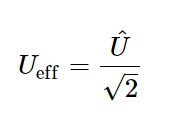


Schalldruck:

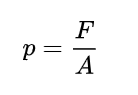

In [ ]:

def Transreciver(ac_in, wave):
    ac_out = 0              

    faktor_piezo = 1.8                                                      #faktor_piezo: Schwingung in Mikrometer pro Volt -> 100 Volt Auslenkung 180 Mikrometer 

    #Transmit
    if ac_in and not wave:                                                  #Aufruf: Transreciver(ac_in, 0)
        
                                                                            #Werte aus Piezo Bachelorarbeit: Durchmesser = 20mm, Hub = 180um, Fmax = 3500N 
        Fmax = 3500
        amplitude_piezo = faktor_piezo * ac_in["amplitude"]
        d = 0.02                                                            #Durchmesser Membran 
        A = (math.pi*d*d)/4                                                 #Membranfäche 
        p0 = 101325                                                         #Luftdruck,(Einheit Pascal) -> N/m^2
        p = p0 + Fmax/A                                                     #Schalldruck (Formel von Wikipedia)

        if ac_in["wave"]=="sin":   
            p_eff = p/math.sqrt(2)                                          #Effektivwert bei sinusförmigem Signal 
        

        wave = {                                                            #Ultraschallwelle erstellen 
            "pressure": p_eff, 
            "time": ac_in["time"]
        }


    #Recive
    if not ac_in and wave:                                                  #Aufruf: Transreciver(0, wave)
        amplitude_ac_out = (wave["pressure"]/faktor_piezo)*math.sqrt(2)     #wave liefert Effektivwert -> Amplitude um Faktor Sqrt(2) höher
        time = wave["time"]
        ac_out = {
            "amplitude": amplitude_ac_out,
            "time": time
        }

    return wave, ac_out

**Object** 

In [ ]:
def Object(wave, UMWELT, OBJEKT_POS_MAX):
    position={
        "dic_distance":random.random()*OBJEKT_POS_MAX["dic_max_distance"],                  #Entfernung und Lage des Objekts
        "dic_alpha":random.random()*OBJEKT_POS_MAX["dic_max_alpha"]
    }

    c=331.46*np.sqrt(1+(UMWELT["dic_temperatur"]/273.15))                                   #Berechnung der Schallgeschwinidigkeit in Abhängigkeit der Temperatur



    p_back = wave["pressure"] * 1/(4*position["dic_distance"]*position["dic_distance"])     #Schalldruck nimmt quadratisch zur Entfernung ab

    time = wave["time"] + 2*position["dic_distance"]/c                                      #Berechnung der Laufzeit
    noice = ((random.randrange(-10, 10))/100)*time                                          #Rauschen -> Zwischen -10% und +10% der Laufzeit
    time = time + noice

    wave = {
        "pressure": p_back, 
        "time": time
    }
    #Für Plot
    UMWELT["dic_position"]=position
    return wave

**SignalComputing** 

In [ ]:
def SingalComputing(ac_out, timestart):
    time_diff = ac_out["time"] - timestart          #Berechnung der Zeitdifferenz
    return time_diff

**Calculation** 




In [ ]:
def Calculation (time_diff,  UMWELT, SENSOR):
    #Parameter
    c=331.46*np.sqrt(1+(UMWELT["dic_temperatur"]/273.15))   #Berechnung der Schallgeschwinigkeit in Abhängigkeit der Temperatur

    distance_blind=(c*SENSOR["dic_t_blind"])/2              #Berechnung der Blindstrecke (Dauer Sendeimpuls inkl. An- und Abklingverhalten)
                                                                                                
    distance = (c * time_diff) / 2                          #Berechnung der Distanz

    if distance<=distance_blind:
        distance=0
    elif distance>SENSOR["dic_max_distance"]:
        distance="Object outside range"
    return distance

**UserOutput** 

In [ ]:

def UserOutput(distance, UMWELT):

  fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))      #Detektierte Position
  fig.suptitle('Benutzer-Ausgabe')
  ax1.set_ylim(0,10)
  ax1.set_yticks(np.arange(0,10,2))
  ax1.plot(math.pi/2, distance, 'r.') 
  ax1.set_xlabel('Detektierte Position')

  ax2.set_ylim(0,10)                                                             #Orginal Objekt Position
  ax2.set_yticks(np.arange(0,10,2))
  ax2.plot(UMWELT["dic_position"]["dic_alpha"]*math.pi/180, UMWELT["dic_position"]["dic_distance"], 'r.') 
  ax2.set_xlabel('Original Objekt Position')

  plt.show()
  print('Distanz:')
  print (distance)

# Main


Zum Start drücken Sie die Taste s
s


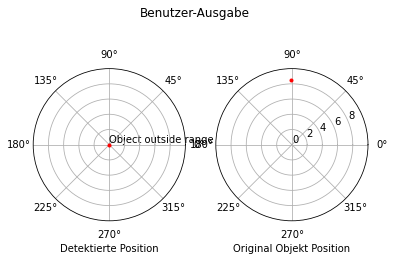

Distanz:
Object outside range


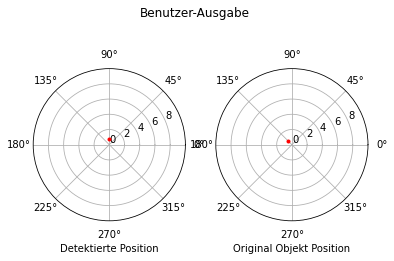

Distanz:
0.6976139107688579


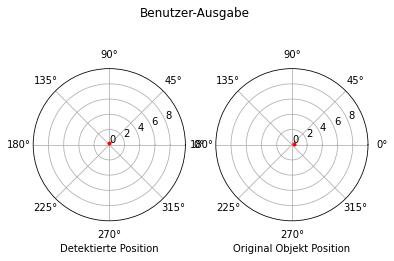

Distanz:
0.2575838299088621


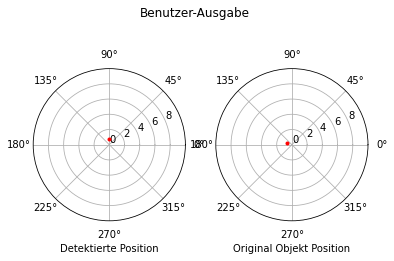

Distanz:
0.7382588863281982


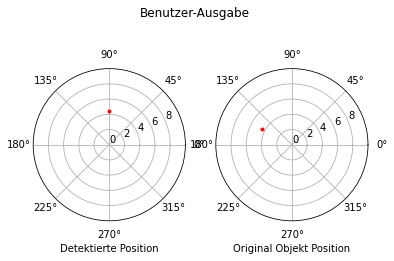

Distanz:
4.373544485706164


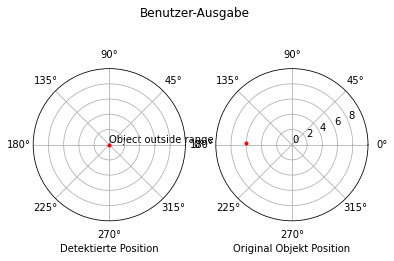

Distanz:
Object outside range


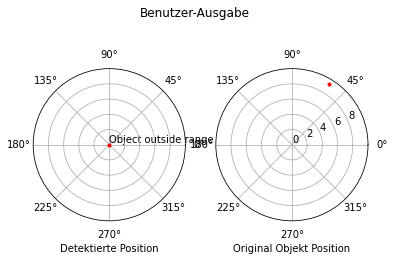

Distanz:
Object outside range


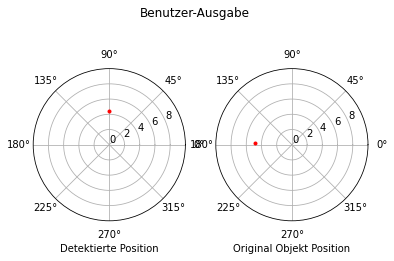

Distanz:
4.481765652894993


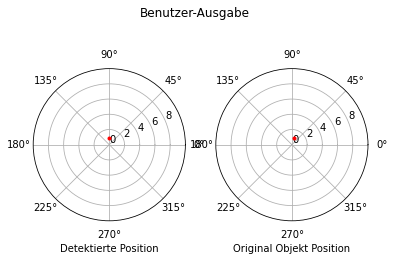

Distanz:
0.8314394359917302


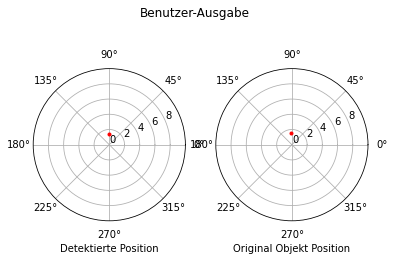

Distanz:
1.3946294455334323


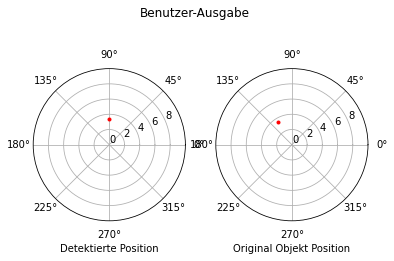

Distanz:
3.3884556043226164


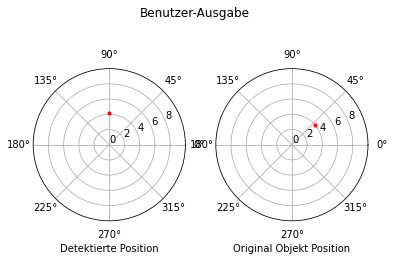

Distanz:
4.181326542879785


KeyboardInterrupt: ignored

In [ ]:
UMWELT={
    "dic_c0":331.46,
    "dic_temperatur":20,
    "dic_position":0
}

SENSOR={
    "dic_t_blind":0.0002,
    "dic_max_distance":5
}

OBJEKT_POS_MAX={
    "dic_max_distance":10,
    "dic_max_alpha":180
}
#Keyboard abfrage -> Wird "start" eingetippt läuft Programm
#Wird nichts oder was anderes eingetippt liefert StartStopp() den Wert false
print("Zum Start drücken Sie die Taste s")

user_input = input()

if user_input == "s":
    user_input = True     
else: 
    user_input = False  

if user_input == "g":
  user_input = False


while user_input == True:
  on_off = StartStopp(user_input)

  dig_signal = ControlUnit(on_off)

  time_start, ac_in = PulsControl(dig_signal)

  wave, ac_out = Transreciver(ac_in, 0)

  wave_back = Object(wave, UMWELT, OBJEKT_POS_MAX)                    

  wave, ac_out = Transreciver(0, wave_back)

  time_diff = SingalComputing(ac_out, time_start)

  dist = Calculation(time_diff,  UMWELT, SENSOR)

  UserOutput(dist, UMWELT)

  time.sleep(1)